# Homework assignment 3: Decision trees and ROC curves

** Objective: ** The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.

** Material: ** Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.

** Important: ** When handing in your homework:
+ Provide clear and complete answers to the questions below under a seperate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Before you hand in your assignment, make sure all figures include legends, titles, and axis-labels as necessary. 
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


## While notebooks are good for handing in homework, the actual programming can best be done in an IDE like Spyder (which comes with Anaconda). This is easier for debugging, variable checking, and checking the python doc of the function you're using. 

#### Luca Parolo: s1009497

## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
Load the wine data set `Data/wine.mat`. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. ** To make sure all data has the correct shape, type, or values that you expect, I strongly recommend making this assignment in the Spyder IDE and checking out the variable explorer. ** 

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ might be shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension, e.g. 'attributeNames = [i[0] for i in wine_data['attributeNames'][0]]' . For more on list comprehension, check http://www.secnetix.de/olli/Python/list_comprehensions.hawk *



In [2]:
import numpy as np
from scipy.io import loadmat
import scipy.io
import scipy as sp
from sklearn import tree

##I load the wine dataset
wine_data = sp.io.loadmat("C:/Users/Luca/Desktop/wine.mat")

##I extrapolate the array called "X" which contains the rows we are intersted

wine_wines=wine_data['X']

##I extrapolate the array called "y" which contains the class denomination (red or white)

wine_class=wine_data['y']



In [3]:
##As expected the wine_wines array contains the rows, we have 6305 rows for 11 attributes

np.shape(wine_wines)


(6304, 11)

In [4]:
##As expected the wine_class array contains the class, we have 6305 rows for 11 attributes
np.shape(wine_class)


(6304, 1)

In [5]:
##We can reshape our class array

wine_class.ravel()

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

#### 3.1.2
 (2 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py`. 

** hints: **   
*Help documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  


#### Answer theoretical questions:
 The min_sample_split parameter makes possible to decide the "minimum number of samples required to split an internal node". This means that , in the case we use 100 , the decision tree will need at least 100 records to split a leaf. In the case that the number is too small, it is higly probable that the decision tree will overfit, reproducing exactly the data in the dataset but not being able to make useful prediction; if on the other hand the number is too high the decision tree will not be able to split one node when would be necessary and usefull, and doing so it will not learn.


In [6]:
from sklearn import tree
import treeprint

In [7]:
## Now we can feed our decision tree with the 2 arrays

clf = tree.DecisionTreeClassifier(criterion="gini",min_samples_split=100)
clf = clf.fit(wine_wines,wine_class)


In [8]:
##we create an array with the attribute names

attribute_names=["Fixed acidity", "Volatile acidity", "Citric acid", "Residual sugar", "Chlorides","Free sulfur dioxide","Total sulfur dioxide","Density","pH","Sulphates","Alcohol"]


##ANd one array with the class names

class_names=["Red","White"]

In [9]:
##Now we can print our decision tree

treeprint.tree_print(clf,attribute_names,class_names )

         |->3  White
         |
      |->2 then if Sulphates =< 0.5550000071525574: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.04649999737739563: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.36500000953674316: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.990820050239563: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.100000023841858: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.9927499890327454: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.050999999046325684: go to 15, else go to 16
   |        |  |        |
   |        |  |       

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2.

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function. *

In [10]:
##To predict a wine with the decision tree we just made we just need to call the predict function giving the right parameters
 
clf.predict([[6.9, 1.09, 0.06, 2.1,0.0061,12,31,0.99,3.5,0.64,12]])

array([1], dtype=uint8)

As expected the decision tree correctly prints the value 1 which stands for "white"

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?

#### Answer theoretical questions:


To check for accuracy we use the score function. Our decision tree has almost 99% of accuracy. It seems it works pretty well!


In [11]:
##we create a new array which contains the predictions 

predictions=clf.predict(wine_wines[0:6304])

In [12]:
##I am not sure if I am allowed to use this function or you wanted me to code an accuracy function from scratch, but since it is
##already here, why not simply use it

clf.score(wine_wines, wine_class)

0.98683375634517767

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) Load the wine data set `Data/wine.mat` using the `loadmat()` function. Divide the data into a training and a test data set. Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree, by modifying its maximum depth. For different values of parameter `depth` (from 2 to 20), first fit the decision tree, and then compute the classification error on the training and test set (this is called holdout cross-validation). Plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions.* 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?

#### Answer theoretical questions:



The optimal tree depth appears to be around 3 or 4. From the 5th level on, the errors are very stable and ther isn't any significant improvement. Sometimes the score are worst with a max depth > 5. Error values are subject to change when we divide again the original datasetin test set and train set as the process shuffle randomly the dataset before dividing it.



In [13]:
from scipy.io import loadmat
from sklearn import model_selection, tree
from sklearn.model_selection import train_test_split


wine_data = sp.io.loadmat("C:/Users/Luca/Desktop/wine.mat")


In [14]:
##I extrapolate the array called "X" which contains the rows we are intersted

wine_wines=wine_data['X']

##I extrapolate the array called "y" which contains the class denomination (red or white)

wine_class=wine_data['y']


In [15]:
##Now I can split the data in a training and a test set. For this exercises I will use a 80-20 percent ratio

wine_train, wine_test, class_train, class_test = train_test_split(wine_wines, wine_class,test_size=0.2 )

In [16]:
print(wine_test)

[[  8.1     0.545   0.18  ...,   3.3     0.59    9.   ]
 [  6.8     0.91    0.06  ...,   3.53    0.64   10.9  ]
 [  5.4     0.3     0.3   ...,   3.31    0.4    13.6  ]
 ..., 
 [  6.1     0.17    0.29  ...,   3.26    0.57   11.2  ]
 [  7.1     0.2     0.35  ...,   3.11    0.54   11.1  ]
 [  6.5     0.33    0.3   ...,   3.25    0.63   12.5  ]]


In [17]:
## Now I can fit the tree with the train set

clf = tree.DecisionTreeClassifier(criterion="gini",min_samples_split=100)
clf = clf.fit(wine_train,class_train)

In [18]:
##We then build a loop to evaluate different maximum depth of the tree to identify the best model


depth=[]
errorsTrain=[]
errorsTest=[]
for i in range (2,21):
    clf = tree.DecisionTreeClassifier(criterion="gini",min_samples_split=100,max_depth=i)
    clf = clf.fit(wine_train,class_train)
    errorsTrain.append(clf.score(wine_train, class_train))
    errorsTest.append(clf.score(wine_test, class_test))
    depth.append(i)

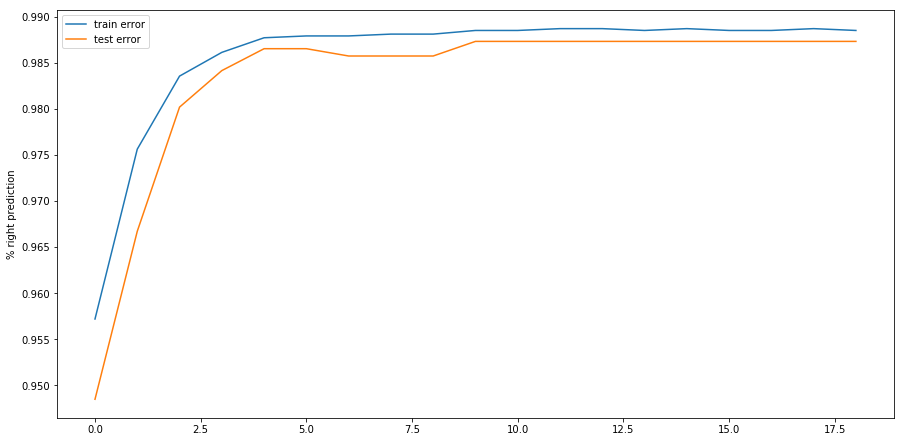

In [19]:
#Finally we can plot the two arrays errorsTrain and errorsTest in respect to the max_depth

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,7.5))
plt.ylabel('% right prediction')
plt.plot(errorsTrain, label="train error")
plt.plot(errorsTest, label="test error")
plt.legend()
plt.show()

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?

#### Answer theoretical questions:

As in the previous exercise, the optimal tree depth seems to be between 3 and 5. Beyond this depth we don't gain any significant % in accuracy. Of course when we run again we obtain slightly different values ,as the Kfold is initiated with shuffle=True and a random_state, but the general learning model remains the same , so there is no significant difference. In the case of 100-fold cross validation we will have 100 iteration, each with a different test set that corresponds to 1%. We can expect from this that the decision tree learns a little bit better, as it has more data in the training set. Therefore, a larger K, means a lower probability of underestimate the true error (simply because we have more samples to train our model on).  This may be somehow usefull if we have a very limited dataset to work on, but when we have 6000 rows as in our example dataset , it's only more computationally expensive and does add nothing significant to our model. 

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

kf=KFold(n_splits=10,shuffle=True, random_state=100)
kf.get_n_splits(wine_wines)
kf.get_n_splits(wine_class)

##we want to store for each fold , the train set, the test set and the train classes and test classes
## Therefore we buil 4 dictionaries
dTest=dict.fromkeys([1, 2, 3, 4,5,6,7,8,9,10])
dTrain=dict.fromkeys([1, 2, 3, 4,5,6,7,8,9,10])
dTestClass=dict.fromkeys([1, 2, 3, 4,5,6,7,8,9,10])
dTrainClass=dict.fromkeys([1, 2, 3, 4,5,6,7,8,9,10])

i=0
##we call our function 
for train_index, test_index in kf.split(wine_wines):
    
    X_train, X_test = wine_wines[train_index], wine_wines[test_index]
   
    y_train, y_test = wine_class[train_index], wine_class[test_index]
   
    i+=1
    ##we save each iteration in our dictionaries
    a=str(i)
    dTest[a] = X_test
    dTrain[a]= X_train
    dTestClass[a] = y_test
    dTrainClass[a] = y_train

We can now check if our dictionaries have the right shapes. We expect the dTest to be 631x11, the dTrain to be 5673x11, the dTestClass to be 631x1, and the dTrainClass to be 5673x1. 

In [30]:
print ("dTest: ", np.shape(dTest["1"]))
print ("dTrain: ", np.shape(dTrain["1"]))
print ("dTestClass: ", np.shape(dTestClass["1"]))
print ("dTrainClass: ", np.shape(dTrainClass["1"]))

dTest:  (631, 11)
dTrain:  (5673, 11)
dTestClass:  (631, 1)
dTrainClass:  (5673, 1)


We are happy with our result, so now we can proceed with building a decision tree for every train set and test it with the test  set we have. 

In [31]:
#we build our tree
clf = tree.DecisionTreeClassifier(criterion="gini",min_samples_split=100)

errorsTrain=[]
errorsTest=[]

#we train our tree, we test it, and than we append the error to a list we will use later
##we do the same for every key in each dictionary



for x in range (1,10):
    
    
    clf = clf.fit(dTrain[str(x)],dTrainClass[str(x)])
    errorsTrain.append(clf.score(dTest[str(x)], dTestClass[str(x)]))
    errorsTest.append(clf.score(dTrain[str(x)], dTrainClass[str(x)]))
   

print ("These are the scores for each different fold: " , errorsTrain)

These are the scores for each different fold:  [0.98732171156893822, 0.99049128367670369, 0.98098256735340728, 0.97464342313787644, 0.97142857142857142, 0.98412698412698407, 0.98095238095238091, 0.97777777777777775, 0.97777777777777775]


Now we can compute the average classification errors on the test- and training sets across the 10 cross-validation folds. To do so we just calculate the means of the array with the stored errors we already have

In [32]:
print ("This is the mean over all the TRAIN session on kFold=10", np.mean(errorsTrain))
print ("This is the mean over all the TEST session on kFold=10", np.mean(errorsTest))

This is the mean over all the TRAIN session on kFold=10 0.980611386422
This is the mean over all the TEST session on kFold=10 0.98742715408


Now we evaluate each fold at different tree depth, using the code we developed earlier

In [33]:


##we build 2 dictionaries to store the 19 values for each fold for TRain and Test errors
errorsTests = {}
errorsTrains={}

for x in range(1,11):
    errorsTrains[x]=[]
    errorsTests[x]=[]
    for i in range (2,21):
        
        clf = tree.DecisionTreeClassifier(criterion="gini",min_samples_split=100,max_depth=i)
        clf = clf.fit(dTrain[str(x)],dTrainClass[str(x)])
        errorsTrains[x].append(clf.score(dTrain[str(x)], dTrainClass[str(x)]))
        errorsTests[x].append(clf.score(dTest[str(x)], dTestClass[str(x)]))


Finally we can plot the errors in respect to the depth for each fold. For clarity we divide them between test errors and train errors 

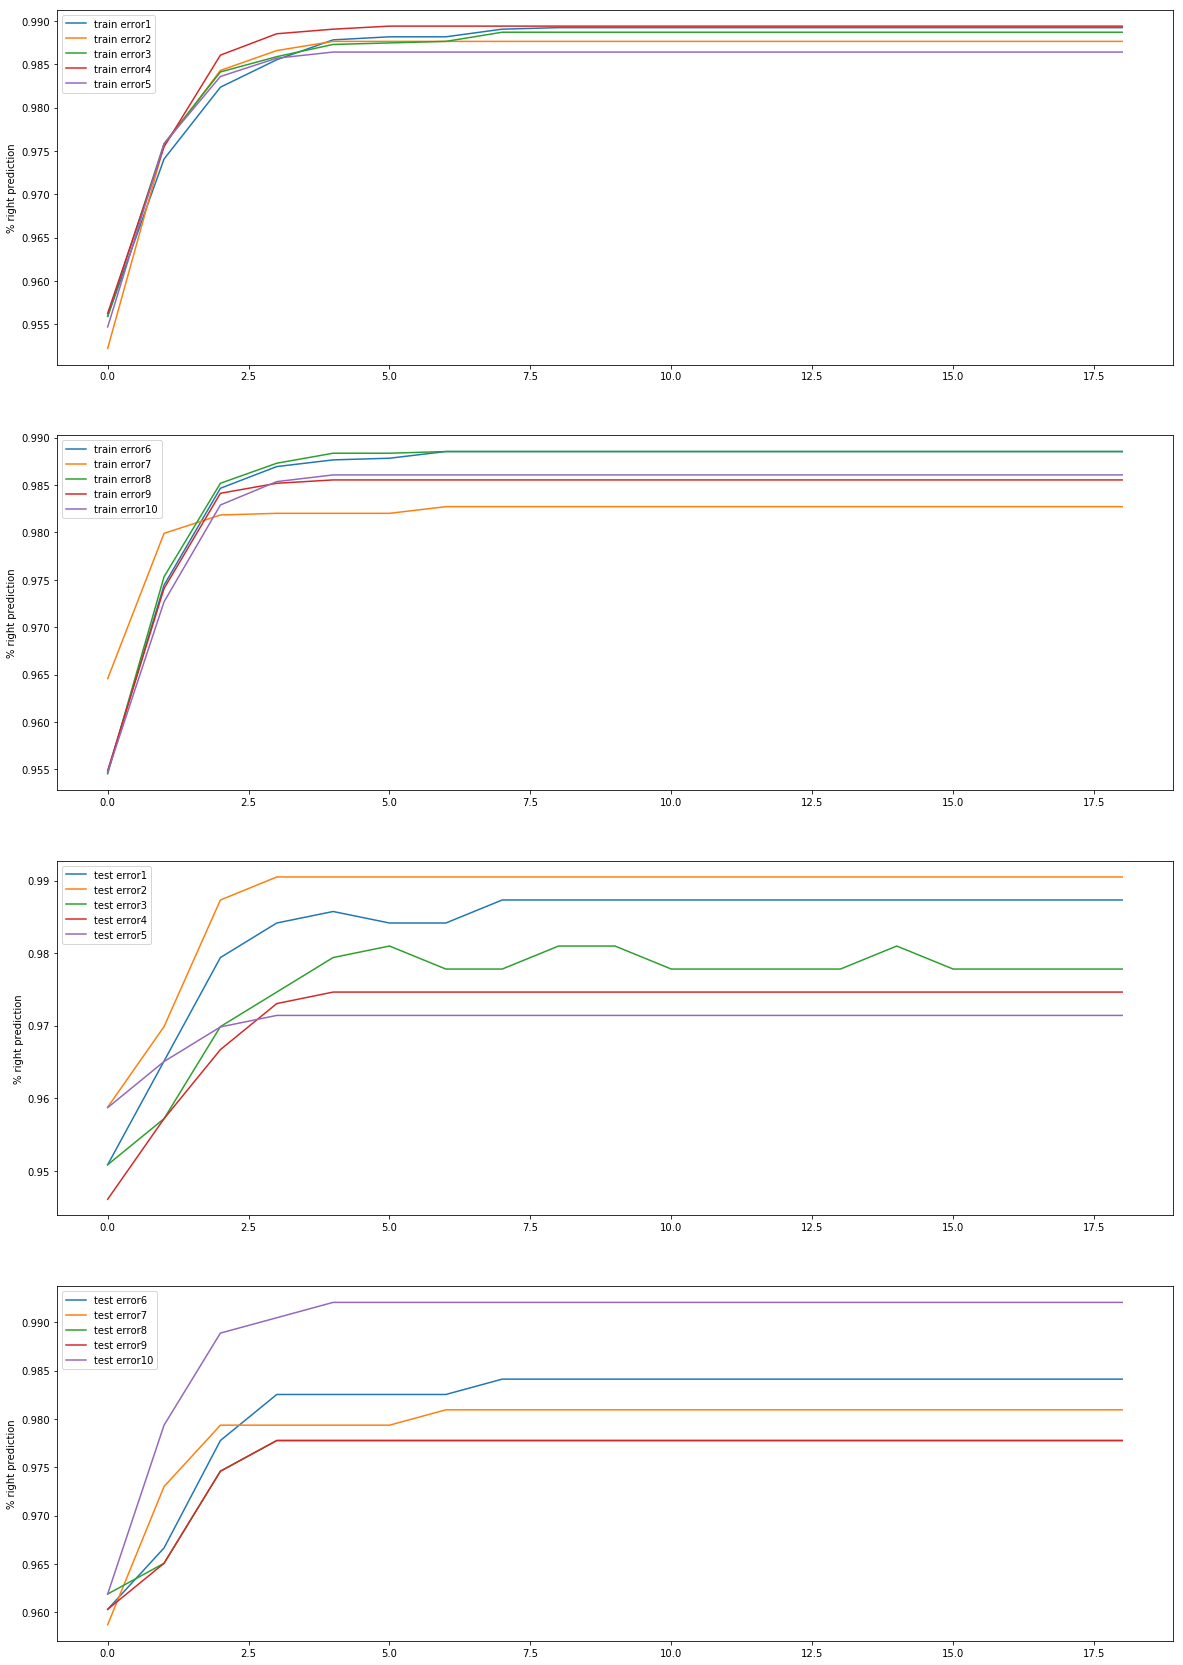

In [34]:


plt.figure(1,figsize=(20,30))



plt.subplot(4,1,1)
plt.ylabel('% right prediction')

for x in range(1,6):

    plt.plot(errorsTrains[x], label="train error"+(str(x)))
  

plt.legend()
    
   
plt.subplot(4,1,2)
plt.ylabel('% right prediction')

for x in range(6,11):

    plt.plot(errorsTrains[x], label="train error"+(str(x)))
   

plt.legend()    

plt.subplot(4,1,3)
plt.ylabel('% right prediction')


for x in range(1,6):

    plt.plot(errorsTests[x], label="test error"+(str(x)))

plt.legend()    


plt.subplot(4,1,4)
plt.ylabel('% right prediction')

for x in range(6,11):

   plt.plot(errorsTests[x], label="test error"+(str(x)))

plt.legend()    


    

plt.show()

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    
To make sure you understand how ROC works, you can make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    


#### 3.3.1
  Load the file `Data/classprobs.xls`. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).

** hints: **
*To get a column (in list form) from a file opened with xlrd, you can use the `col_values()` function on that file, e.g. `col0 = doc.col_values(0)`.*


In [414]:
import numpy as np
import xlrd

doc = xlrd.open_workbook('Data/classprobs.xls').sheet_by_index(0)


In [415]:
##we get the columns we are interested in
values= doc.col_values(0)
scores1 = doc.col_values(1)
scores2 = doc.col_values(2)

#### 3.3.2 
(1 pts) Calculate the ROC curves for the classifiers and plot them. Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the ROC. *
 

In [416]:
from sklearn.metrics import roc_curve

##we copmute the first ROC
fpr1, tpr1, thresholds1 = metrics.roc_curve(values, scores1)

##we compute the second ROC
fpr2, tpr2, thresholds2 = metrics.roc_curve(values, scores2)



Now we can plot the first and second ROC

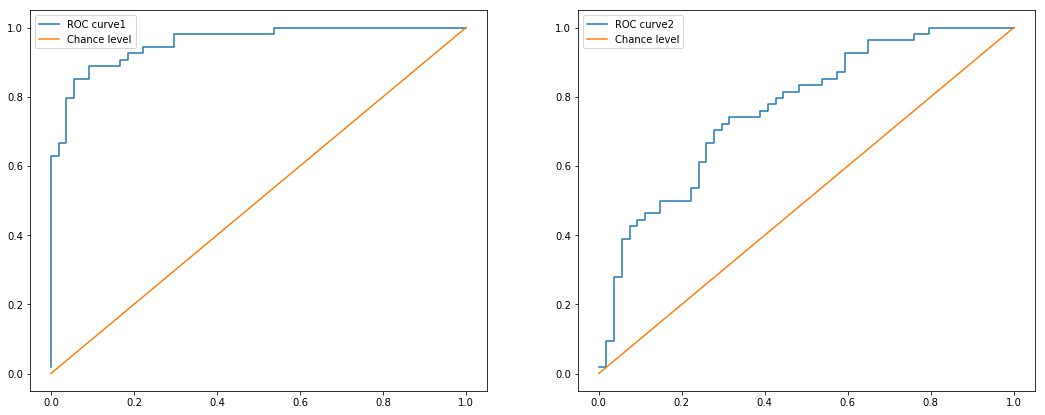

In [417]:
plt.figure(1, figsize=(18,7))

plt.subplot(1,2,1)
plt.plot(fpr1,tpr1, label="ROC curve1")
plt.plot([0, 1], [0, 1], label="Chance level")
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr2, tpr2, label="ROC curve2")
plt.plot([0, 1], [0, 1], label="Chance level")

plt.legend()
plt.show()

As we can see from the plots both the classifiers perform better than the chance level.It's already visible that the first classifier performs better, as the AUC seems bigger.

#### 3.3.3
(1 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

We compute the AUC score for both classifiers.First of all we build 2 dictionaries to assign to each value (0 or 1) its correspondent probability for both models.

In [472]:
probs1=dict(zip(scores1,values))
probs2=dict(zip(scores2,values))

we divide each dictionary in ones and zeroes

In [473]:
Probs1zero={}
Probs1ones={}
Probs2zero={}
Probs2ones={}

##1st dictionary zeroes
for key , value in probs1.items():
    if value ==0:
        Probs1zero.update({key:value})

##1st dictionary ones
for key , value in probs1.items():
    if value == 1:
        Probs1ones.update({key:value})
        
##2nd dictionary zeroes
for key , value in probs2.items():
    if value == 0:
        Probs2zero.update({key:value})
        
##2nd dictionary ones
for key , value in probs2.items():
    if value == 1:
        Probs2ones.update({key:value})
        



We compute the m  and n  for both models 

In [474]:
zeroes=0
ones=0
for i in values:
    if i==0:
        zeroes+=1
    else:
        ones+=1


Now we compute the 2 sigmas of the formula for both models

In [475]:
sigma1=0
sigma2=0

##1st model
for key in Probs1ones.keys():
    for key2 in Probs1zero.keys():
        if key>key2:
            sigma1+=1
            
##2nd model
for key  in Probs2ones.keys():
    for key2,value2 in Probs2zero.items():
        if key>key2:
            sigma2+=1

Now that we have all the variables we need we can use the formula to cumpute the AUC

In [476]:
AUC1=sigma1/(zeroes*ones)
AUC2=sigma2/(zeroes*ones)

print ("This is the AUC for the first model", AUC1)
print ("This is the AUC for the second model", AUC2)

This is the AUC for the first model 0.9564471879286695
This is the AUC for the second model 0.7654320987654321


We double check with the sklearn AUC function

In [477]:
from sklearn import metrics

print (metrics.auc(fpr1, tpr1))
print (metrics.auc(fpr2, tpr2))


0.956447187929
0.765432098765


As we see the AUC are the same. Our formula is right!


#### 3.3.4 
(0.5 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

In [501]:
##we make a copy of the original dictionaries
predict1=dict(probs1)
predict2=dict(probs2)

In [502]:
##we build variable to count
replacedzero1=0
replacedone1=0
replacedzero2=0
replacedone2=0

##We replace the true values with the predicted values and we count how many values are replaced

##model1

for key,value in predict1.items():
    if key>=0.5 and value == 0.0:
        
        ##we update values in the dictionary
        predict1.update({key:1.0})
        
        ##Numbers of false negative model 1
        replacedzero1+=1
        
        
    elif key<0.5 and value == 1.0:
        
        ##we update values in the dictionary
        predict1.update({key:0.0})
        
        ##Numbers of false positive model 1
        replacedone1+=1 
       
       
##model2


for key,value in predict2.items():
    if key>=0.5 and value == 0.0:
        
        ##we update values in the dictionary
        predict2.update({key:1.0})
        
        ##Numbers of false negative model 2
        replacedzero2+=1
       
        
        
    elif key<0.5 and value == 1.0:
        
        ##we update values in the dictionary
        predict2.update({key:0.0})
        
        ##Numbers of false positive model 2
        replacedone2+=1
        

We check if everything went well

In [505]:
##we check if our code worked as expected
for key,value in predict1.items():
    if key>=0.5 and value == 0.0:
        print (key,value)
        
for key,value in predict1.items():
    if key<0.5 and value == 1.0:
        print (key,value)

for key,value in predict2.items():
    if key>=0.5 and value == 0.0:
        print (key,value)
        
for key,value in predict2.items():
    if key<0.5 and value == 1.0:
        print (key,value)

As expected nothing is printed. Now we can compute accuracy as the fraction of true positive and negative over all values for both models

We sum the false positives and negatives

In [503]:
replaced1=  replacedzero1 +replacedone1
replaced2=  replacedzero2 +replacedone2

Finally we compute the accuracy

In [508]:
accuracy1= (len(values)-replaced1)/len(values)
accuracy2= (len(values)-replaced2)/len(values)

print ("Accuracy first model", accuracy1)
print ("Accuracy second model", accuracy2)

Accuracy first model 0.8611111111111112
Accuracy second model 0.6944444444444444


#### 3.3.5
(0.5 pts) Create the 2x2 table of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

In [364]:
from sklearn import metrics

metrics.auc(fpr1,tpr1)

0.95644718792866945

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero-hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of the random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you both used your coin during 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])


Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [2]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero-hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this:

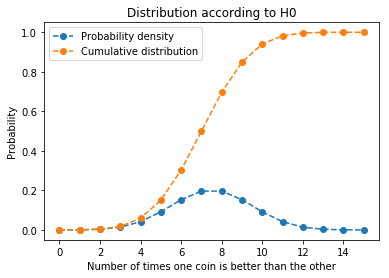

In [3]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero-hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [4]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.035


So your observations are unlikely if *zero-hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.